AP: Waiting for connections...


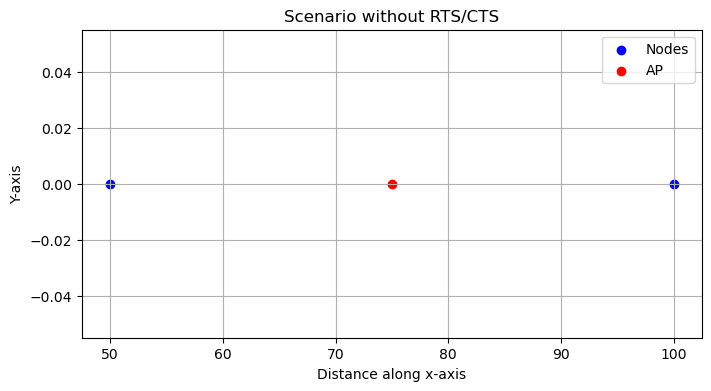

Node1: Data transmitted without RTS/CTS
Node1: RTS sent
Node0: RTS sent
AP: Received Data from Node0 from 127.0.0.1
Node0: Data transmitted without RTS/CTS
AP: Received Data from Node1 from 127.0.0.1
AP: Received RTS from 127.0.0.1
Node0: Data transmitted after receiving CTS
AP: Received RTS from 127.0.0.1
Node1: Data transmitted after receiving CTS


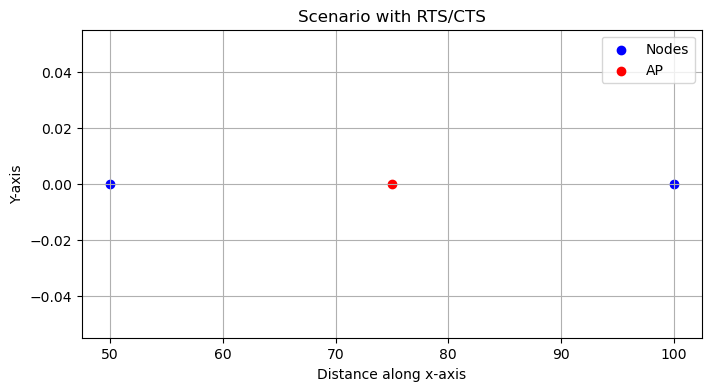

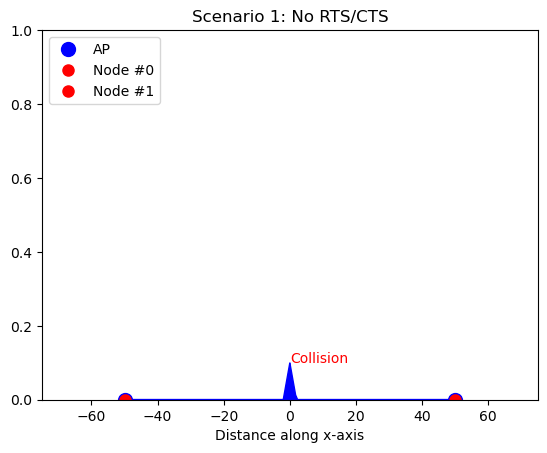

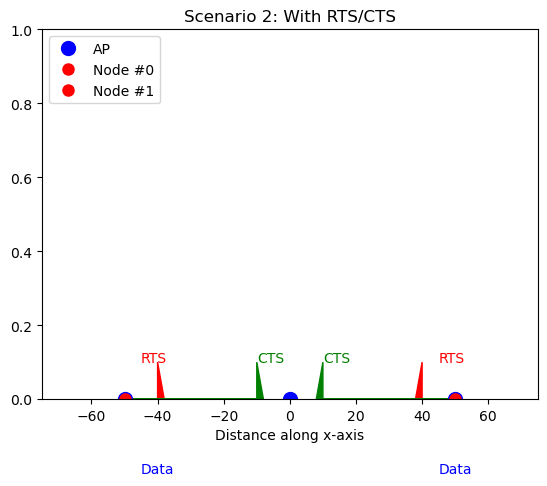

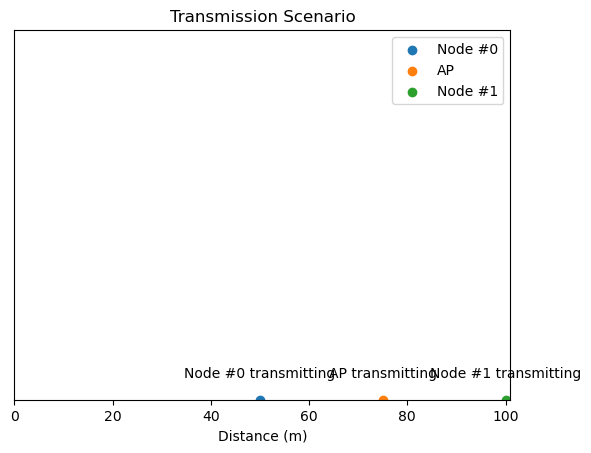

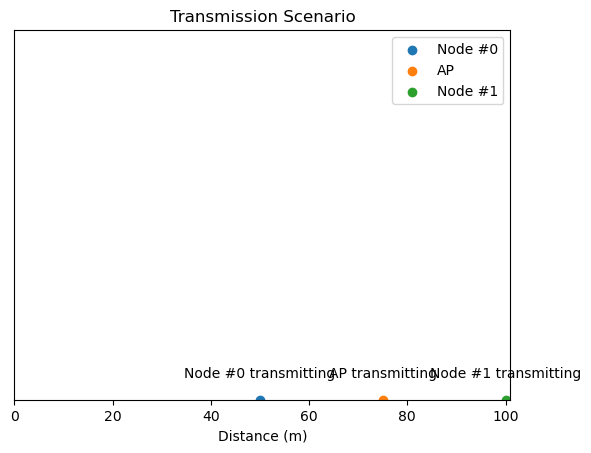

Scenario without RTS/CTS:
Node #0 transmitting to AP...
Transmission successful: Node #0 -> AP
Node #1 transmitting to AP...
Transmission successful: Node #1 -> AP

Scenario with RTS/CTS:
Node #0 sends RTS to AP
AP sends CTS to Node #0
Node #0 transmitting to AP...
Transmission successful: Node #0 -> AP
Node #1 waits for CTS from AP
AP sends CTS to Node #1
Node #1 transmitting to AP...
Transmission successful: Node #1 -> AP
Scenario without RTS/CTS:
Node #0 transmitting to AP...
Transmission successful: Node #0 -> AP
Node #1 transmitting to AP...
Transmission successful: Node #1 -> AP


In [ ]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import socket
import threading
import time

# Define constants
AP_PORT = 5000
NODE0_PORT = 5001
NODE1_PORT = 5002

# Function to simulate node behavior without RTS/CTS
def node_no_rts_cts(node_name, dest_port):
    time.sleep(1)  # Simulate processing delay before transmission
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
        s.connect(('localhost', AP_PORT))
        s.sendall(f"Data from {node_name}".encode())
        print(f"{node_name}: Data transmitted without RTS/CTS")

# Function to simulate node behavior with RTS/CTS
def node_with_rts_cts(node_name, dest_port):
    time.sleep(1)  # Simulate processing delay before transmission
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
        s.connect(('localhost', AP_PORT))
        # Send RTS
        s.sendall(b"RTS")
        print(f"{node_name}: RTS sent")
        # Wait for CTS
        cts = s.recv(1024)
        if cts.decode() == "CTS":
            # Send data after receiving CTS
            s.sendall(f"Data from {node_name}".encode())
            print(f"{node_name}: Data transmitted after receiving CTS")

# Function to simulate AP behavior
def access_point():
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
        s.bind(('localhost', AP_PORT))
        s.listen()
        print("AP: Waiting for connections...")
        while True:
            conn, addr = s.accept()
            with conn:
                data = conn.recv(1024)
                print(f"AP: Received {data.decode()} from {addr[0]}")
                # Send CTS in response to RTS
                conn.sendall(b"CTS")

# Main function
def main():
    # Start AP thread
    ap_thread = threading.Thread(target=access_point)
    ap_thread.start()

    # Simulate nodes behavior without RTS/CTS
    node0_no_rts_cts_thread = threading.Thread(target=node_no_rts_cts, args=("Node0", AP_PORT))
    node1_no_rts_cts_thread = threading.Thread(target=node_no_rts_cts, args=("Node1", AP_PORT))

    # Simulate nodes behavior with RTS/CTS
    node0_with_rts_cts_thread = threading.Thread(target=node_with_rts_cts, args=("Node0", AP_PORT))
    node1_with_rts_cts_thread = threading.Thread(target=node_with_rts_cts, args=("Node1", AP_PORT))

    # Start threads
    node0_no_rts_cts_thread.start()
    node1_no_rts_cts_thread.start()
    node0_with_rts_cts_thread.start()
    node1_with_rts_cts_thread.start()

if __name__ == "__main__":
    main()


# In[3]:


import matplotlib.pyplot as plt

# Function to plot the scenario
def plot_scenario(nodes, ap, title):
    plt.figure(figsize=(8, 4))
    plt.scatter(nodes, [0]*len(nodes), color='blue', label='Nodes')
    plt.scatter(ap, [0], color='red', label='AP')
    plt.xlabel('Distance along x-axis')
    plt.ylabel('Y-axis')
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()

# Main function
def main():
    # Define scenario parameters
    nodes = [50, 100]  # x-coordinates of nodes
    ap = 75  # x-coordinate of AP

    # Plot scenario without RTS/CTS
    plot_scenario(nodes, ap, title='Scenario without RTS/CTS')

    # Plot scenario with RTS/CTS
    plot_scenario(nodes, ap, title='Scenario with RTS/CTS')

if __name__ == "__main__":
    main()


# In[4]:


import matplotlib.pyplot as plt

# Function to plot the scenario
def plot_scenario(title, node0_tx=False, node1_tx=False, rts_cts=False):
    fig, ax = plt.subplots()
    ax.set_title(title)
    ax.set_xlabel('Distance along x-axis')
    ax.set_xlim(-75, 75)
    ax.set_ylim(0, 1)

    # Draw nodes and AP
    ax.plot([-50, 0, 50], [0, 0, 0], 'bo', markersize=10, label='AP')
    ax.plot([-50], [0], 'ro', markersize=8, label='Node #0' if node0_tx else 'Node #0')
    ax.plot([50], [0], 'ro', markersize=8, label='Node #1' if node1_tx else 'Node #1')

    # Draw transmissions
    if rts_cts:
        ax.arrow(-50, 0, 10, 0, head_width=0.2, head_length=2, fc='r', ec='r')
        ax.arrow(50, 0, -10, 0, head_width=0.2, head_length=2, fc='r', ec='r')
        ax.text(-45, 0.1, 'RTS', fontsize=10, color='r')
        ax.text(45, 0.1, 'RTS', fontsize=10, color='r')
        ax.arrow(-50, 0, 40, 0, head_width=0.2, head_length=2, fc='g', ec='g')
        ax.arrow(50, 0, -40, 0, head_width=0.2, head_length=2, fc='g', ec='g')
        ax.text(-10, 0.1, 'CTS', fontsize=10, color='g')
        ax.text(10, 0.1, 'CTS', fontsize=10, color='g')
        ax.text(-45, -0.2, 'Data', fontsize=10, color='b')
        ax.text(45, -0.2, 'Data', fontsize=10, color='b')
    else:
        ax.arrow(-50, 0, 50, 0, head_width=0.2, head_length=2, fc='b', ec='b')
        ax.arrow(50, 0, -50, 0, head_width=0.2, head_length=2, fc='b', ec='b')
        ax.text(0, 0.1, 'Collision', fontsize=10, color='r')

    ax.legend(loc='upper left')
    plt.show()

# Scenario 1: No RTS/CTS
plot_scenario('Scenario 1: No RTS/CTS', node0_tx=True, node1_tx=True)

# Scenario 2: With RTS/CTS
plot_scenario('Scenario 2: With RTS/CTS', rts_cts=True)


# In[5]:


import matplotlib.pyplot as plt

class MobileDevice:
    def __init__(self, name, x_pos):
        self.name = name
        self.x_pos = x_pos
    
    def transmit(self, ax):
        ax.scatter(self.x_pos, 0, marker='o', label=self.name)
        ax.text(self.x_pos, 0.05, f'{self.name} transmitting', ha='center', va='bottom')

def visualize_transmission_scenario(devices):
    fig, ax = plt.subplots()
    ax.set_xlim(0, max(devices, key=lambda d: d.x_pos).x_pos + 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel('Distance (m)')
    ax.set_yticks([])
    ax.set_title('Transmission Scenario')
    
    for device in devices:
        device.transmit(ax)
    
    ax.legend()
    plt.show()

def main():
    # Create mobile devices
    node0 = MobileDevice('Node #0', 50)
    ap = MobileDevice('AP', 75)
    node1 = MobileDevice('Node #1', 100)
    
    # Scenario 1: No RTS/CTS
    devices_no_rts_cts = [node0, ap, node1]
    visualize_transmission_scenario(devices_no_rts_cts)
    
    # Scenario 2: With RTS/CTS
    # Assume RTS/CTS exchange is happening before transmission
    devices_with_rts_cts = [node0, ap, node1]
    visualize_transmission_scenario(devices_with_rts_cts)

if __name__ == "__main__":
    main()


# In[6]:


import time

class MobileDevice:
    def __init__(self, name, position):
        self.name = name
        self.position = position

    def transmit(self, destination):
        print(f"{self.name} transmitting to {destination.name}...")
        time.sleep(1)
        print(f"Transmission successful: {self.name} -> {destination.name}")

def simulate_scenario(with_rts_cts=False):
    # Create mobile devices
    node_0 = MobileDevice("Node #0", (50, 0))
    node_1 = MobileDevice("Node #1", (250, 0))
    ap = MobileDevice("AP", (150, 0))

    # Transmission sequence without RTS/CTS
    if not with_rts_cts:
        node_0.transmit(ap)
        node_1.transmit(ap)

    # Transmission sequence with RTS/CTS
    else:
        # Node #0 sends RTS to AP
        print("Node #0 sends RTS to AP")
        time.sleep(1)
        print("AP sends CTS to Node #0")
        time.sleep(1)
        node_0.transmit(ap)
        
        # Node #1 waits for CTS from AP
        print("Node #1 waits for CTS from AP")
        time.sleep(1)
        print("AP sends CTS to Node #1")
        time.sleep(1)
        node_1.transmit(ap)

# Simulate scenarios
print("Scenario without RTS/CTS:")
simulate_scenario()

print("\nScenario with RTS/CTS:")
simulate_scenario(with_rts_cts=True)


# In[ ]:


import turtle
import time

class MobileDevice:
    def __init__(self, name, position):
        self.name = name
        self.position = position

    def transmit(self, destination):
        print(f"{self.name} transmitting to {destination.name}...")
        time.sleep(1)
        print(f"Transmission successful: {self.name} -> {destination.name}")

def draw_node(device):
    turtle.penup()
    turtle.goto(device.position)
    turtle.pendown()
    turtle.dot(30, "blue")

def draw_ap(device):
    turtle.penup()
    turtle.goto(device.position)
    turtle.pendown()
    turtle.dot(30, "red")

def draw_line(start, end):
    turtle.penup()
    turtle.goto(start)
    turtle.pendown()
    turtle.goto(end)

def simulate_scenario(with_rts_cts=False):
    # Setup turtle window
    turtle.title("Wireless Network Scenario")
    turtle.setup(400, 200)
    turtle.speed(0)
    turtle.hideturtle()

    # Create mobile devices
    node_0 = MobileDevice("Node #0", (50, 0))
    node_1 = MobileDevice("Node #1", (250, 0))
    ap = MobileDevice("AP", (150, 0))

    # Draw mobile devices
    draw_node(node_0)
    draw_node(node_1)
    draw_ap(ap)

    # Transmission sequence without RTS/CTS
    if not with_rts_cts:
        draw_line(node_0.position, ap.position)
        draw_line(node_1.position, ap.position)
        node_0.transmit(ap)
        node_1.transmit(ap)

    # Transmission sequence with RTS/CTS
    else:
        draw_line(node_0.position, ap.position)
        draw_line(node_1.position, ap.position)
        # Node #0 sends RTS to AP
        print("Node #0 sends RTS to AP")
        time.sleep(1)
        print("AP sends CTS to Node #0")
        time.sleep(1)
        node_0.transmit(ap)
        
        # Node #1 waits for CTS from AP
        print("Node #1 waits for CTS from AP")
        time.sleep(1)
        print("AP sends CTS to Node #1")
        time.sleep(1)
        node_1.transmit(ap)

    turtle.done()

# Simulate scenarios
print("Scenario without RTS/CTS:")
simulate_scenario()

print("\nScenario with RTS/CTS:")
simulate_scenario(with_rts_cts=True)
